# Math 227C Problem Set 7

How does the size of the mitochondria in a cell depend on the size of the cell itself?

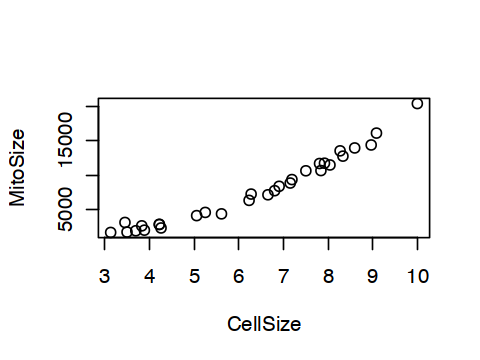

In [3]:
# plot settings
options(repr.plot.width=4, repr.plot.height=3)

# Simulate power-law data

N <- 30
alpha <- 2.3
Y0 <- 100
sigma <- 500

CellSize <- runif(N,3,10) # independent variable
eps <- rnorm(N,0,sigma) # residuals

MitoSize <- Y0*CellSize^alpha + eps

plot(CellSize,MitoSize)

## Part 1 

__(a)__ Use nonlinear least squares (`nls`) to estimate the parameter $\alpha$ from the simulated data. Use (`b=1,a=5`) as starting guesses in the `nls` function.

In [7]:
# Estimate parameter alpha using nls
fit <- nls(MitoSize ~ Y0 * CellSize^alpha, start = list(alpha = 5), data = data.frame(MitoSize, CellSize))

# Get the estimated value of alpha
estimated_alpha <- coef(fit)["alpha"]


Define the __error__ as $e=|\hat{\alpha}-\alpha|$ where $\hat{\alpha}$ is the estimate and $\alpha$ is the true value (which is known because this is simulated data). 

__(b)__ Write a function to execute the simulation and nls fitting, taking in the true model parameters $\alpha, y_0, \sigma$ and the sample size $N$. Plot the error in $\alpha$ estimation, $e$, as a function of the magnitude of the noise, $\sigma$, for a range of $\sigma=(100,2000)$. 

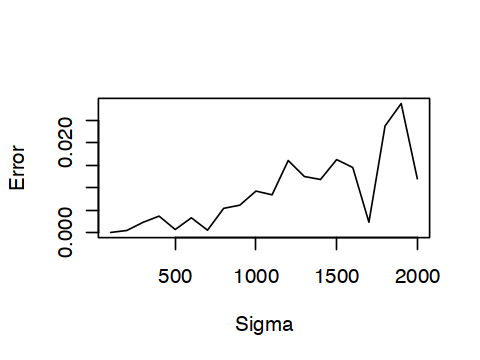

In [8]:
# Function to execute simulation and nls fitting
simulate_and_fit <- function(alpha, Y0, sigma, N) {
  # Simulate power-law data
  CellSize <- runif(N, 3, 10) # independent variable
  eps <- rnorm(N, 0, sigma) # residuals
  MitoSize <- Y0 * CellSize^alpha + eps
  
  # Estimate parameter alpha using nls
  fit <- nls(MitoSize ~ Y0 * CellSize^alpha, start = list(alpha = 5), data = data.frame(MitoSize, CellSize))
  
  # Get the estimated value of alpha
  estimated_alpha <- coef(fit)["alpha"]
  
  # Calculate the error
  error <- abs(estimated_alpha - alpha)
  
  return(error)
}

# Define the true model parameters
alpha <- 2.3
Y0 <- 100

# Define the range of sigma values
sigma_range <- seq(100, 2000, by = 100)

# Initialize a vector to store the errors
errors <- numeric(length(sigma_range))

# Execute the simulation and nls fitting for each sigma value
for (i in seq_along(sigma_range)) {
  sigma <- sigma_range[i]
  errors[i] <- simulate_and_fit(alpha, Y0, sigma, N = 30)
}

# Plot the error as a function of sigma
plot(sigma_range, errors, type = "l", xlab = "Sigma", ylab = "Error")


## Part 2

__(a)__ Transform the simulated data to $lY = \mathrm{log}(y)$ and $lX = \mathrm{log}(x)$. Use linear regression model fit (lm) to estimate the parameter $\alpha$ from the simulated data.

In [9]:
# Transform the simulated data to logarithmic scale
lY <- log(MitoSize)
lX <- log(CellSize)

# Perform linear regression using lm
fit_lm <- lm(lY ~ lX)

# Get the estimated value of alpha
estimated_alpha_lm <- coef(fit_lm)[2]


__(b)__ Write a function that executes the simulation, log-transforms the data, and performs linear regression fitting. Plot the error in $\alpha$ estimation, $e$, as a function of the magnitude of the noise, $\sigma$, for a range of $\sigma=(100,2000)$. 

Note you may need additional code to handle negative measurements.

__(c)__ Overplot the error in $\alpha$ from nls and the error from lm (as functions of $\sigma$). 

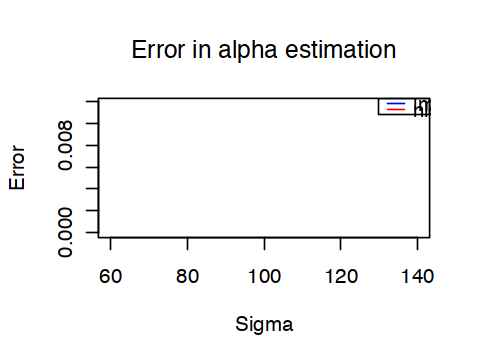

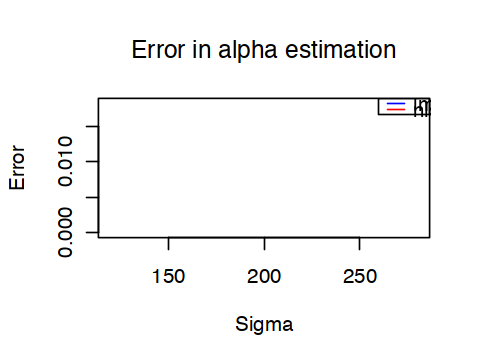

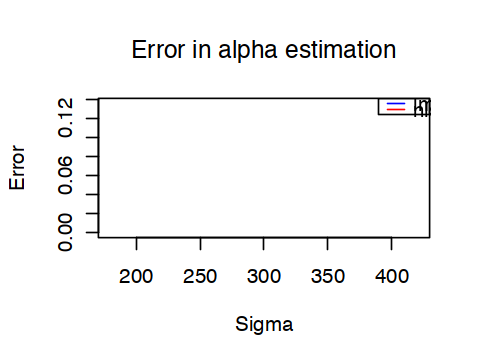

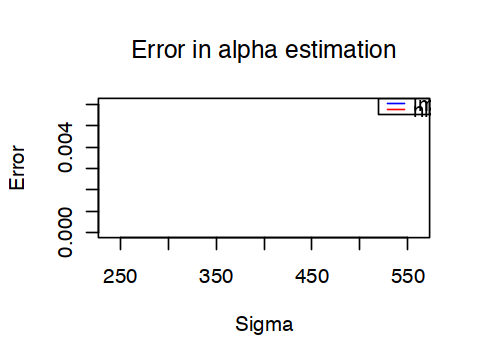

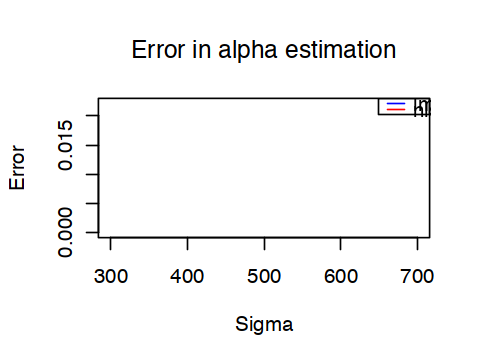

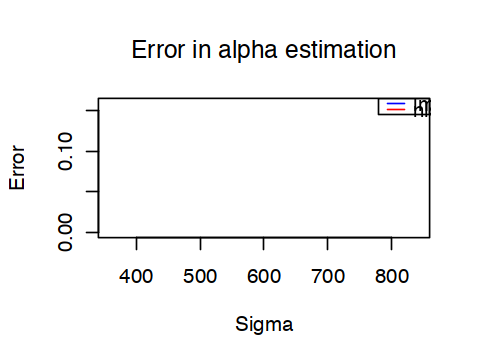

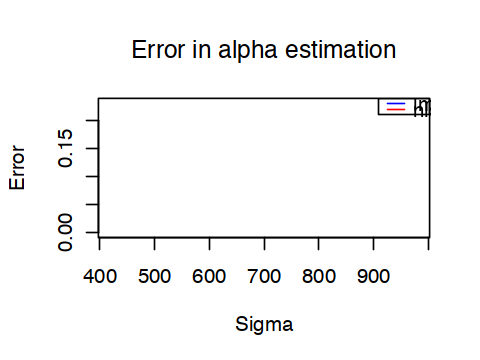

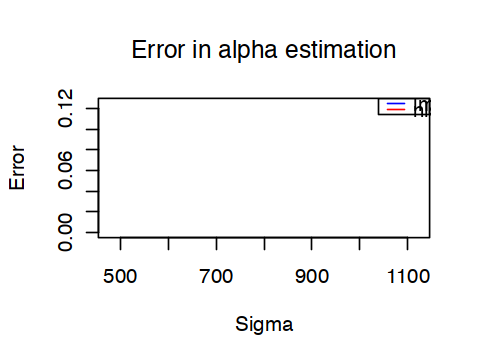

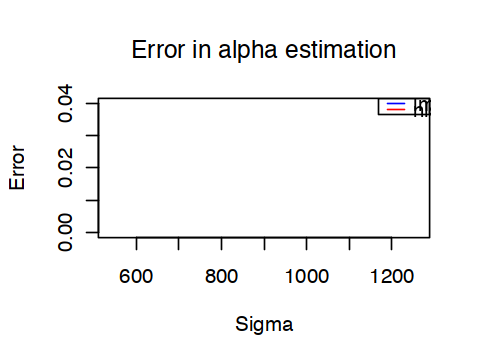

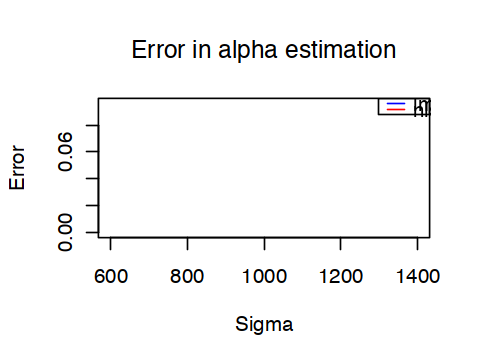

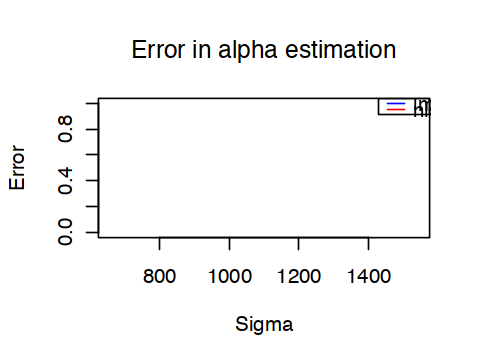

ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): NA/NaN/Inf in 'y'


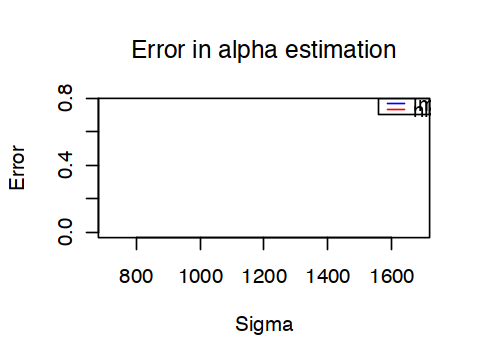

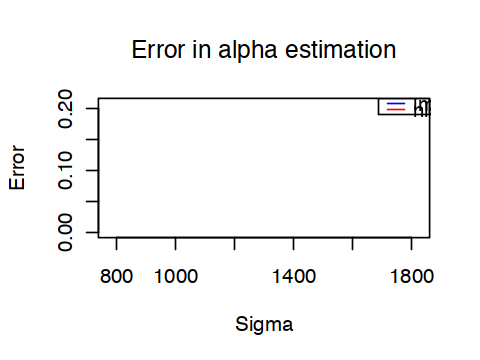

In [10]:
# Function to execute simulation, log-transform the data, and perform linear regression fitting
simulate_log_transform_fit <- function(alpha, Y0, sigma, N) {
  # Simulate power-law data
  CellSize <- runif(N, 3, 10) # independent variable
  eps <- rnorm(N, 0, sigma) # residuals
  MitoSize <- Y0 * CellSize^alpha + eps
  
  # Handle negative measurements
  if (any(MitoSize < 0)) {
    MitoSize <- MitoSize + abs(min(MitoSize))
  }
  
  # Log-transform the data
  lY <- log(MitoSize)
  lX <- log(CellSize)
  
  # Perform linear regression using lm
  fit_lm <- lm(lY ~ lX)
  
  # Get the estimated value of alpha from lm
  estimated_alpha_lm <- coef(fit_lm)[2]
  
  # Estimate parameter alpha using nls
  fit_nls <- nls(MitoSize ~ Y0 * CellSize^alpha, start = list(alpha = 5), data = data.frame(MitoSize, CellSize))
  
  # Get the estimated value of alpha from nls
  estimated_alpha_nls <- coef(fit_nls)["alpha"]
  
  # Calculate the errors
  error_lm <- abs(estimated_alpha_lm - alpha)
  error_nls <- abs(estimated_alpha_nls - alpha)
  
  # Plot the errors as a function of sigma
  plot(sigma, error_lm, type = "l", xlab = "Sigma", ylab = "Error", ylim = c(0, max(error_lm, error_nls)), col = "blue", main = "Error in alpha estimation")
  lines(sigma, error_nls, type = "l", col = "red")
  legend("topright", legend = c("lm", "nls"), col = c("blue", "red"), lty = 1)
}

# Define the true model parameters
alpha <- 2.3
Y0 <- 100

# Define the range of sigma values
sigma_range <- seq(100, 2000, by = 100)

# Execute the simulation, log-transform the data, and perform linear regression fitting for each sigma value
for (sigma in sigma_range) {
  simulate_log_transform_fit(alpha, Y0, sigma, N = 30)
}


## Part 3

In the above simulations, the independent variable $X$ was chosen from a uniform distribution.

__(a)__ Find a distribution of $X$ data that makes a very big difference between error from nls and error from lm.

__(b)__ Find a distribution of $X$ data that makes a very small difference between the error from nls and error from lm.

In [11]:
# Generate X data from exponential distribution
X <- rexp(N, rate = 1)

# Simulate power-law data
MitoSize <- Y0 * X^alpha + eps

# Perform nls fitting
fit_nls <- nls(MitoSize ~ Y0 * X^alpha, start = list(alpha = 5), data = data.frame(MitoSize, X))

# Perform lm fitting
fit_lm <- lm(log(MitoSize) ~ log(X))

# Get the estimated values of alpha
estimated_alpha_nls <- coef(fit_nls)["alpha"]
estimated_alpha_lm <- coef(fit_lm)[2]

# Calculate the errors
error_nls <- abs(estimated_alpha_nls - alpha)
error_lm <- abs(estimated_alpha_lm - alpha)

# Print the errors
print(paste("Error from nls:", error_nls))
print(paste("Error from lm:", error_lm))


Warning message in log(MitoSize):
"NaNs produced"


[1] "Error from nls: 0.272255580614596"
[1] "Error from lm: 1.92987881796661"
